# Lab 5

# Theories and Background Knowledge

## 1. Introduction to Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to fit a line (in simple linear regression) or a hyperplane (in multiple linear regression) that best predicts the dependent variable based on the independent variables. It is one of the most fundamental techniques in data science and machine learning for predicting numerical outcomes.

In simple linear regression, we model the relationship between a single independent variable and the dependent variable. Multiple linear regression extends this to handle multiple independent variables.

## 2. Assumptions of Linear Regression

For linear regression to work effectively, several assumptions must hold:
- **Linearity**: The relationship between the independent variables and the dependent variable should be linear.
- **Independence**: The residuals (errors) should be independent of each other.
- **Homoscedasticity**: The variance of residuals should be constant across all levels of the independent variables.
- **Normality of Errors**: The residuals should be normally distributed for valid hypothesis testing.

## 3. Ordinary Least Squares (OLS) Method

Ordinary Least Squares (OLS) is the most common method used to estimate the coefficients in linear regression. It works by minimizing the sum of squared differences between the observed values and the predicted values. This method finds the best-fitting line or hyperplane that reduces the error between actual and predicted values.

## 4. Model Evaluation Metrics

After fitting a regression model, it’s essential to evaluate its performance using different metrics:
- **Mean Absolute Error (MAE)** measures the average of the absolute errors between predicted and actual values.
- **Mean Squared Error (MSE)** gives the average of the squared errors, with a larger penalty for larger errors.
- **Root Mean Squared Error (RMSE)** is the square root of the MSE and brings the error measure back to the original units.
- **R-Squared** tells us how well the independent variables explain the variability in the dependent variable, ranging from 0 to 1.

## 5. Coefficients Interpretation

In a multiple linear regression model, each coefficient represents the expected change in the dependent variable for a one-unit change in the respective independent variable, while holding all other variables constant. These coefficients help us understand the impact of each independent variable on the dependent variable.

## 6. Residual Analysis

Residuals are the differences between the observed and predicted values. Analyzing residuals is crucial to assess the quality of the regression model. Residual plots can help identify if the assumptions of linear regression are violated. For example, if residuals show patterns, it may indicate issues such as non-linearity or heteroscedasticity.

## 7. Sklearn Linear Regression

The **scikit-learn** library provides an implementation of linear regression, where it automatically computes the coefficients using OLS and provides methods to evaluate the model's performance. It is widely used in practice due to its ease of use and robust functionality.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from io import StringIO
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In the given Boston housing dataset, using multiple linear regression formulation derived in your lab session, fit a regression line to the data in order to predict the housing price (i.e. median value of owner
occupied homes (in 1000s)). And performfollowing:




In [ ]:

# Define the column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Path to your uploaded file
file_path = 'boston_housing.txt'

# Line number to start reading from (e.g., 100th line, so index is 99)
start_line = 47

# Read the file starting from the desired line
with open(file_path, 'r') as file:
    lines = file.readlines()[start_line:]  # Skip lines before start_line

# Convert the remaining lines into a string
data = "".join(lines)

# Load the data into a DataFrame
df = pd.read_csv(StringIO(data), sep='\s+', names=columns, header=None)

# Display the DataFrame
df.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
# reading the rows from test_indices.txt
test_rows = pd.read_csv('test_indices.txt', header=None, names=['row_index'])
test_rows

# creating a test_df
# test_df = df[test_rows['row_index'].values]

test_df = df.loc[test_rows['row_index']]

y_test = test_df['MEDV'] # creating y_test dataframe
x_test = test_df.drop(columns=['MEDV'], axis= 1) # creating a x_test dataframe


In [ ]:
# reading the rows_from the train_indices.txt
train_rows = pd.read_csv('train_indices.txt', header=None, names=['row_index'])

# dropping the last column from the file
train_rows.drop(332, inplace= True)

train_df = df.loc[train_rows['row_index']]

y_train = train_df['MEDV'] # creating y_train dataframe
x_train = train_df.drop(columns=['MEDV'], axis= 1) # creating a x_train dataframe




#Multivariable Regression

The goal of multiple linear regression is to find a relationship between the output variable and two or more input variables. This relationship is represented mathematically as follows:

$$\hat{y } = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{n}x_{n}$$
 $\beta_{1}$ through $\beta_{d}$ are the estimated regression coefficients for the independent variables $x_{1}$ through $x_{n}$. Then:
$$y  = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{d}x_{d} +\epsilon$$

where $\epsilon$ is the random error, which reflects the difference between the actual output value and predicted output value.

We have $m$ set of observations. So we can write:
$$
\begin{matrix}
 y_1 = & \beta_0 + \beta_1x_{11}+\beta_2x_{12}+ \cdots + \beta_dx_{1n}+\epsilon_1\\
y_2 =  & \beta_0 + \beta_1x_{21}+\beta_2x_{22}+ \cdots + \beta_dx_{2n}+\epsilon_2\\
 y_3 = & \beta_0 + \beta_1x_{31}+\beta_2x_{32}+ \cdots + \beta_dx_{3n}+\epsilon_3\\
 \vdots&\vdots \\
y_n = & \beta_0 + \beta_1x_{m1}+\beta_2x_{m2}+ \cdots + \beta_dx_{mn}+\epsilon_n
\end{matrix}
$$

$x_{mn}$ is the $m$th observation for $n$th feature or input variable. These $m$ set of equations can be written in matrix form as:

$$\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} =   \begin{bmatrix}
  1 & x_{11} & \cdots & x_{1n} \\
  1 & x_{21} & \cdots & x_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{m1} & \cdots & x_{mn}
 \end{bmatrix}\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_d
\end{bmatrix}+ \begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{bmatrix}$$

Using mathematical notations, we can write as:

$$\mathbf{y}= \mathbf{X}\boldsymbol{\beta} + \mathbf{\epsilon} ...(1)$$

From OLS, our objective is to find a column matrix or a column vector, $\boldsymbol{\beta}$, such that _Sum of Squared Errors_, $\text{SSE}$ is minimum. $\text{SSE}$ is written as:

$$\text{SSE} = \sum_{i=1}^{m} (y_i-\hat{y_i})^2 = \sum_{i=1}^{m}\epsilon_i^2 $$

Since

$$\epsilon^T\epsilon  = \begin{bmatrix}
\epsilon_1  & \epsilon_2  &\dots  & = \epsilon_m
\end{bmatrix}.\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_m
\end{bmatrix} = \epsilon_1^2+\epsilon_2^2+\dots\epsilon_m^2 = \sum_{i=1}^{m}\epsilon_i^2$$

We can also write $\text{SSE}$ as:
$$\text{SSE} =\sum_{i=1}^{n}\epsilon_i^2 =  \epsilon^T\epsilon$$



From equation $\text{(1)}$, we know that

$$\mathbf{\epsilon} = \mathbf{y}- \mathbf{X}\boldsymbol{\beta}$$
so we can also write $\text{SSE}$ as:

$$\text{SSE} = \epsilon^T\epsilon = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

This positive quadratic error function or $\text{SSE}$ or objective function is always a convex surface facing upwards as in a simple linear equation. From calculus, the value of parameters at the minimum point is obtained by setting the first derivative of the objective function, with respect to the parameters, equal to $0$. So, we will take the partial derivative of the objective function, with respect to $\boldsymbol{\beta}$, and get the value for the column matrix, $\boldsymbol{\beta}$.

$$\frac{\partial\ \text{SSE} }{\partial \boldsymbol{\beta}}  = \frac{\partial }{\partial \boldsymbol{\beta}}(\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})=\frac{\partial }{\partial \boldsymbol{\beta}}(\mathbf{y^Ty}+\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}-2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y}) $$

You can take a pen and paper and try expanding the product term to the sums. You have to use basic transpose rules and matrix multiplication rules. That's it! Now, we will set the derivative to $0$ as:
$$\frac{\partial }{\partial \boldsymbol{\boldsymbol{\beta}}}(\mathbf{y^Ty}+\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}-2\boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y})=0$$

As we saw for the column vector $\mathbf{\epsilon}$ we know, $\boldsymbol{\beta}^T\boldsymbol{\beta} = \boldsymbol{\beta}^2$. After derivation we can write as:
$$ 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}- 2\mathbf{X}^T\mathbf{y} = 0$$

This can be written as:

$$ 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = 2\mathbf{X}^T\mathbf{y} $$

$$
\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$$

$$\boldsymbol{\beta} =(\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$$

Thus, this normal equation derived is the solution to the unknown parameters in multiple linear regression.

#I.
## Verify that your result is correct by using LinearRegression of sklearn library.

In [ ]:
def calculate_coefficients(x_train, y_train):
    # Convert to NumPy arrays if not already
    X = np.array(x_train)
    y = np.array(y_train)

    # Add a column of ones to X for the intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Calculate the coefficients using the formula
    coefficients = np.linalg.inv(X.T @ X) @ (X.T @ y)

    return coefficients


# Getting regression coefficients
coeffs = calculate_coefficients(x_train, y_train)


In [ ]:
# displaying regression coefficients
func_regr_coef = pd.DataFrame(data=coeffs[1:], index = x_train.columns, columns=['Coefficient'])

print(f"Constant Parameter: { coeffs[0]} ")
func_regr_coef

Constant Parameter: 36.84994498076912 


,Coefficient
CRIM,-0.023071
ZN,0.045475
INDUS,0.075755
CHAS,3.532659
NOX,-20.978313
RM,4.087864
AGE,0.010827
DIS,-1.478973
RAD,0.345116
TAX,-0.013712


In [ ]:
# verfying the function using sklearn
model = LinearRegression()

model.fit(x_train, y_train)

regr_coef = pd.DataFrame(data=model.coef_, index=x_train.columns, columns=['Coefficient'])

print(f"Constant Parameter: { model.intercept_} ")

regr_coef

Constant Parameter: 36.84994498078204 


,Coefficient
CRIM,-0.023071
ZN,0.045475
INDUS,0.075755
CHAS,3.532659
NOX,-20.978313
RM,4.087864
AGE,0.010827
DIS,-1.478973
RAD,0.345116
TAX,-0.013712


#II.
##Evaluate your model on the test set using appropriate metrics and comment onit.

In [ ]:

# y_true
y_true = y_test
# y_pred
y_pred = model.predict(x_test)

# residuals
residuals= y_true - y_pred

# printing the  means Squared error
print(f"MSE: {mean_squared_error(y_true, y_pred)}")

# printing the MAE
print(f"MAE: {mean_absolute_error(y_true, y_pred)}")

# printing the r_score
print(f"R_Square: {r2_score(y_true, y_pred)}")



MSE: 23.863691615370634
MAE: 3.6962203154507036
R_Square: 0.7042437428217285


#comment
## MAE : 3.69
it means predictions are off by $ 3690 .

## R_Square: 0.704 : 70.4 %
It means 70.4%  of the variance in house prices is explained by the model


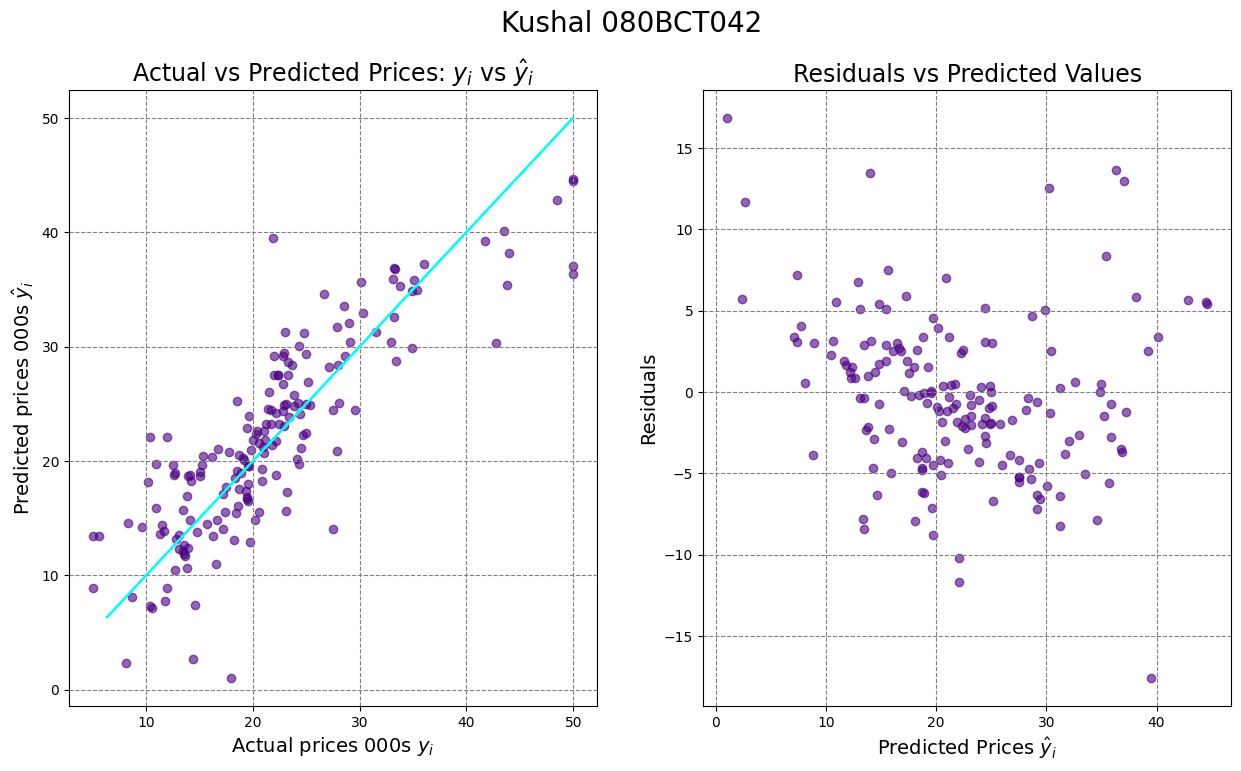

In [ ]:
# Creating the plot of the actual vs predicted prices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), dpi=100)
fig.suptitle("Kushal 080BCT042", fontsize=20)


# Original Regression of Actual vs. Predicted Prices
ax[0].scatter(x=y_true, y=y_pred, c='indigo', alpha=0.6)
ax[0].plot(y_train, y_train, color='cyan')
ax[0].set_title(r'Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$', fontsize=17)
ax[0].set_xlabel(r'Actual prices 000s $y_i$', fontsize=14)
ax[0].set_ylabel(r'Predicted prices 000s $\hat{y}_i$', fontsize=14)
ax[0].grid(linestyle='--', color='grey')


# Residuals vs Predicted Values
ax[1].scatter(x=y_pred, y=residuals, c='indigo', alpha=0.6)
ax[1].set_title('Residuals vs Predicted Values', fontsize=17)
ax[1].set_xlabel(r'Predicted Prices $\hat{y}_i$', fontsize=14)
ax[1].set_ylabel('Residuals', fontsize=14)
ax[1].grid(linestyle='--', color='grey')


# Show the plot
plt.show()

# The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.
# Since there is no specific patterns so no systematic bias.


# III.
---

 Choose any appropriate data point values of your liking, except these: CRIM=0.002 * (your_roll_number), NOX = 0.005 * your_roll_number + 0.35 , DIS=1+ 0.1 * your_roll_number, TAX = 200 + 3* your_roll_number, RAD= (your_roll_number mod 2), and predict the median housing price for it.

In [ ]:
cirm = .0002 * 42
nox = .0005 *42 + .35
dis = 1 + .01 * 42
tax = 200 + 3 * 42
rad = 42% 2

# fecticing the random data from the data base
random_data = df.sample(random_state=10)

# changing the value of columns as specified by the question

random_data['CRIM'] = cirm
random_data['NOX'] = nox
random_data['DIS'] = dis
random_data['TAX'] =tax
random_data['RAD'] = rad

# dropping the Medv columns
true_price = random_data['MEDV']

random_data.drop('MEDV', axis= 1, inplace= True)

# prediciting the value using model
predicted_price = model.predict(random_data)


print(f"True Price: $ {true_price * 1000}")
print(f"Predicted Price: $ {(predicted_price[0] * 1000):.3f}")



True Price: $ 305    28400.0
Name: MEDV, dtype: float64
Predicted Price: $ 31914.853


#IV.
---
 Note each coefficient values and comment on what it could signify.

In [ ]:
new_coeffs =regr_coef

# cirm is negative that means if cirm(crime_rate) increases the median house price devreases
# ZN

new_coeffs['comments'] = [
    'cirm is negative that means if cirm(crime_rate) increases the median house price devreases',
    'If there is more proportiion of landzone then the median house price increases',
    'with increase in proportion of non retail business the median house price increases',
    'If Charles River bounds the house the median house price increases',
    'if the is more pollution the median house price decreases significantly',
    'with increases in average no. of rooms median house price increases',
    'with increases in age of the house median house price increases',
    'with distances to five Boston employment centres median house price decreases',
    'with ease to accessibility to radial highways median house price increases',
    'with full-value property-tax rate per $10,000 median house price decreases',
    'with increase in pupil-teacher ratio by town median house price decreases',
    'with increase in black population in town median house price increases slightly',
    'with increases in % lower status of the population median house price decreases'
]
new_coeffs

,Coefficient,comments
CRIM,-0.023071,cirm is negative that means if cirm(crime_rate...
ZN,0.045475,If there is more proportiion of landzone then ...
INDUS,0.075755,with increase in proportion of non retail busi...
CHAS,3.532659,If Charles River bounds the house the median h...
NOX,-20.978313,if the is more pollution the median house pric...
RM,4.087864,with increases in average no. of rooms median ...
AGE,0.010827,with increases in age of the house median hous...
DIS,-1.478973,with distances to five Boston employment centr...
RAD,0.345116,with ease to accessibility to radial highways ...
TAX,-0.013712,"with full-value property-tax rate per $10,000 ..."


#V.

## Plot residual plot for any two independent variable of your choice and comment on the plot.

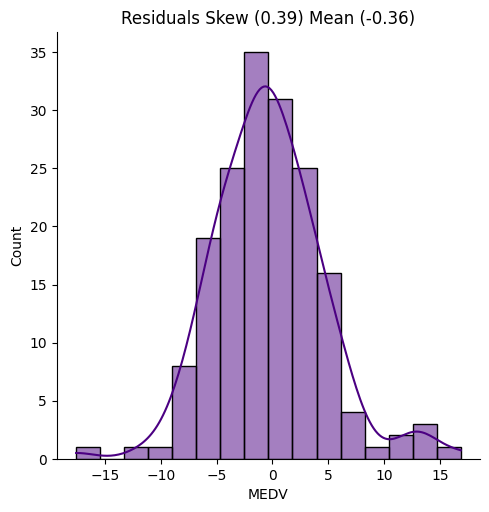

In [ ]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Our residuals have skew and mean close to zero that means our model in good
# Our model doesn't have much of systematic bias


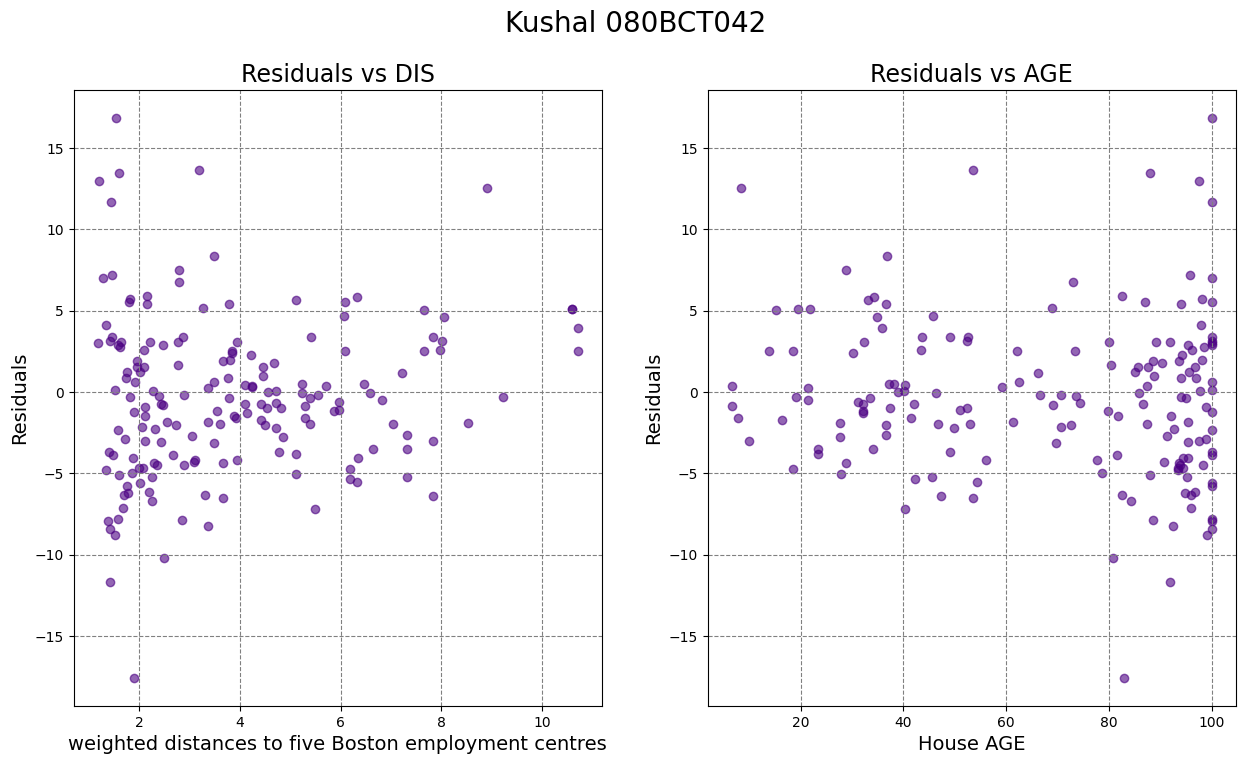

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), dpi=100)
fig.suptitle("Kushal 080BCT042", fontsize=20)


# Residuals vs Independent Values
ax[0].scatter(x=x_test['DIS'], y=residuals, c='indigo', alpha=0.6)
ax[0].set_title(f'Residuals vs DIS', fontsize=17)
ax[0].set_xlabel(r'weighted distances to five Boston employment centres', fontsize=14)
ax[0].set_ylabel('Residuals', fontsize=14)
ax[0].grid(linestyle='--', color='grey')

ax[1].scatter(x=x_test['AGE'], y=residuals, c='indigo', alpha=0.6)
ax[1].set_title(f'Residuals vs AGE', fontsize=17)
ax[1].set_xlabel(r'House AGE', fontsize=14)
ax[1].set_ylabel('Residuals', fontsize=14)
ax[1].grid(linestyle='--', color='grey')

plt.show()




##comment
The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

Since there is not specific patterns observed in the above plots our model doesn't have any systematic bias. Our model can be assumed to be correct and can be used to predict the house prices

# Discussion and Conclusion

## Discussion

In this lab, we applied **Multiple Linear Regression** to predict the median value of homes in the Boston housing dataset using features like crime rate, tax rate, and average number of rooms. After comparing the results with the **LinearRegression** implementation from scikit-learn, the model performed as expected, providing reasonable predictions.

We evaluated the model using metrics like **R-squared** and **MSE**, which indicated that the model fit the data well. However, residual analysis revealed some non-linearity, suggesting that the model could benefit from additional features or more advanced techniques.

When predicting the housing price for a new set of data, the results were consistent with the trends observed in the dataset, demonstrating the model's ability to generalize to unseen data.

## Conclusion

This lab helped us understand the application of **Multiple Linear Regression** for predicting housing prices. By analyzing the model's performance and interpreting the coefficients, we gained insights into the impact of different features on housing prices. Although the model showed a good fit, the residual analysis highlighted potential areas for improvement, such as addressing non-linearity in the data.

Overall, the lab reinforced the importance of understanding regression assumptions, evaluating model performance, and interpreting results to make meaningful predictions.
